In [2]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

## Figure 3

In [3]:
result_path = "/blue/juannanzhou/palash.sethi/Projects/ProteinLLEs/ProteinLLE_v4/output/"

matching_folders = []

for root, dirs, files in os.walk(result_path):
    for dir in dirs:
        if 'Sinai' in dir:
            pass
        # if False:
        #     pass
        elif 'Random' in dir:
            full_dir_path = os.path.join(root, dir)
            if 'done' in os.listdir(full_dir_path):
                matching_folders.append(result_path + dir)

In [4]:
## Get AAV2 results
result_path = "/blue/juannanzhou/palash.sethi/Projects/ProteinLLEs/ProteinLLE_v4/output/"

for root, dirs, files in os.walk(result_path):
    for dir in dirs:
        if 'Sinai' in dir:
            # if 'rep_0' in dir or 'rep_3' in dir:
                full_dir_path = os.path.join(root, dir)
                if 'TF_3_predictions.csv' in os.listdir(full_dir_path):
                    matching_folders.append(result_path + dir)

In [5]:
r2_all = {}

for d in matching_folders:
    r2s = pd.read_csv(d + "/R2s.csv", index_col = 0).to_numpy().T[0]
    r2s = np.pad(r2s, (0, 4 - len(r2s)), mode='constant')
    r2_all[d] = r2s

In [6]:
R2_df = pd.DataFrame(r2_all).T
R2_df.columns = ["Additive", "Pairwise", "4-th order", "8-th order"]
R2_df = R2_df.sort_index()

In [31]:
data_list = pd.read_csv("../Data/Data_prepared/Protein_set.txt", header=None)
data_list = [file.split(".")[0] for file in data_list.iloc[:, 0]]
data_list.remove('Somermeyer2022_amacGFP')

In [32]:
data_summary = pd.read_csv("../Data/Dataset summary-Table 1.csv")

In [33]:
name_dict = {}
for i in range(len(data_summary)):
    name_dict[data_summary.iloc[i]['OldName']] = data_summary.iloc[i]['Name'].split("_")[1]

In [34]:
R2_ = {}

for data in data_list:
    R2_[data] = R2_df[[data in ID for ID in R2_df.index]]

In [35]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['font.family'] =  'Nimbus Sans'

colors = ['gray', '#377eb8',  '#4daf4a', 'orange']

### R2 Curves

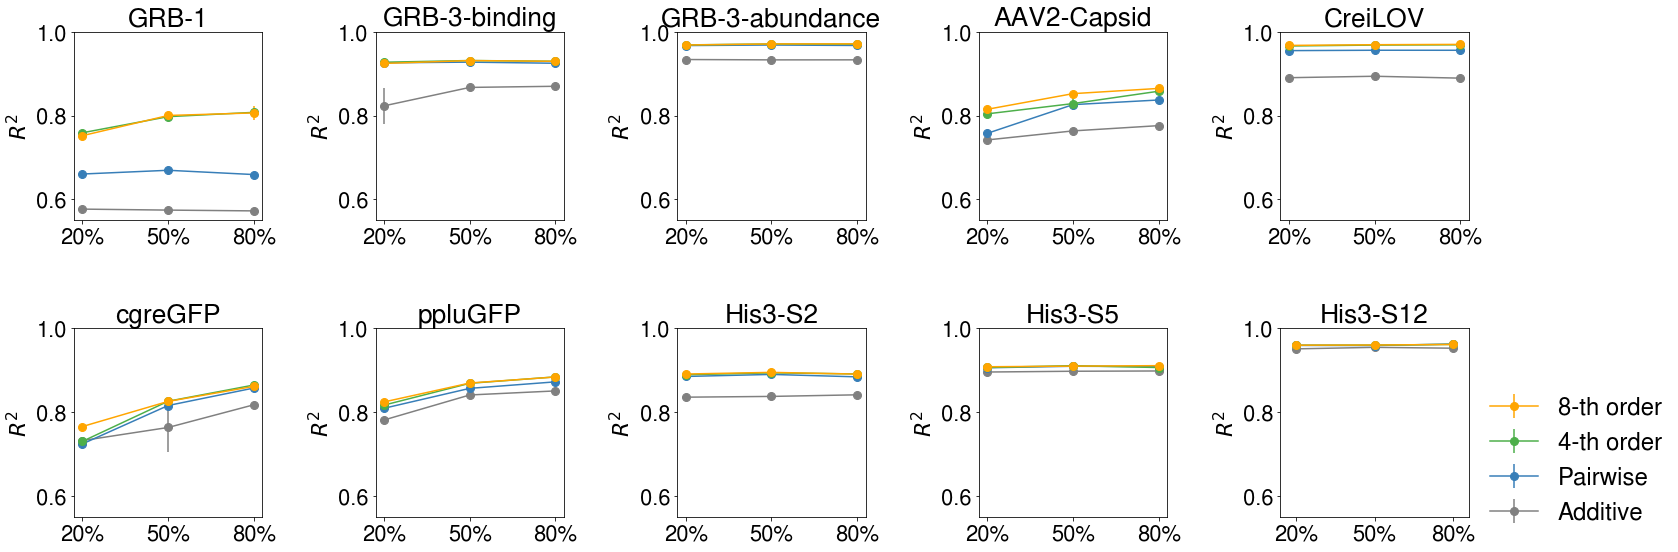

In [36]:
ps = ["20%", "50%", "80%"]

fig, axs = plt.subplots(2, 5, figsize=(25, 10),
                       gridspec_kw={'hspace': 0.2, 'wspace': 0.6})  # 2 rows, 1 column

for i in range(len(data_list)):     
    data_name = data_list[i]
    # df = R2_[data_name]
    # df.sort_index()
    # df.reset_index(drop=True, inplace=True)
    # mean_df = df.groupby(df.index // 2).mean()
    # mean_df.index = ["20%", "50%", "80%"]
    # std_df = df.groupby(df.index // 2).std()
    # std_df.index = ["20%", "50%", "80%"]

    df = R2_[data_name]

    mean_df = []
    std_df = []
    for p in ps:
        df_subp = df.index.astype(str).str.contains("_" + p[:2])
        mean_df.append(df[df_subp].mean())
        std_df.append(df[df_subp].std())
    mean_df = pd.DataFrame(mean_df)
    std_df = pd.DataFrame(std_df)

    mean_df.index = ["20%", "50%", "80%"]
    std_df.index = ["20%", "50%", "80%"] 
    
    # axs[int(i/4), i%4].plot(plotdat, 'o', linestyle='-', markersize=10)
    for j, column in enumerate(mean_df.columns):
        axs[int(i/5), i%5].errorbar(mean_df.index, mean_df[column], yerr=std_df[column], 
                                    color=colors[j],
                                label=column, marker='o', linestyle='-', markersize=8)
        # plt.plot(plotdat.index, plotdat[column], label=column)

    axs[int(i/5), i%5].set_title(name_dict[data_name])
    axs[int(i/5), i%5].set_ylim(0.55, 1)
    axs[int(i/5), i%5].set_ylabel('$R^2$')
    if i == 9:
        handles, labels = axs[int(i/5), i%5].get_legend_handles_labels()
        handles = handles[::-1]
        labels = labels[::-1]
        # axs[int(i/5), i%5].legend(fontsize='smaller')
        axs[int(i/5), i%5].legend(handles, labels, loc='center left', bbox_to_anchor=(1, .3), fontsize=24, frameon=False)
    axs[int(i/5), i%5].set_box_aspect(1)

    
# Set margins
plt.margins(0.1)  # Adjust margins as needed

plt.savefig("../figures/r2s.pdf", bbox_inches='tight')        
plt.show()    

### Delta R2

In [37]:
models = ["Linear", "Pairwise", "4-way", "8-way"]
colors = ['gray', '#377eb8',  '#dede00', 'orange']
colors = ['gray', '#377eb8',  '#4daf4a', 'orange']

In [38]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['font.family'] =  'Nimbus Sans'

colors = ['gray', '#377eb8',  'orange', '#4daf4a']

In [39]:
data_name = 'Somermeyer2022_cgreGFP'
df = R2_[data_name]
mean_df = []
std_df = []
for p in ['80%']:
    df_subp = df.index.astype(str).str.contains("_" + p[:2])
    df_sub = df[df_subp]
    df_sub_b = df_sub.copy()
    for m in [1, 2, 3]:
        df_sub_b.iloc[:, m] = df_sub.iloc[:, m].to_numpy() - df_sub.iloc[:, m - 1].to_numpy()   
    df_sub_b[df_sub_b < 0] = 0
    mean_df.append(df_sub_b.mean())
    std_df.append(df_sub_b.std())
mean_df = pd.DataFrame(mean_df)
std_df = pd.DataFrame(std_df)

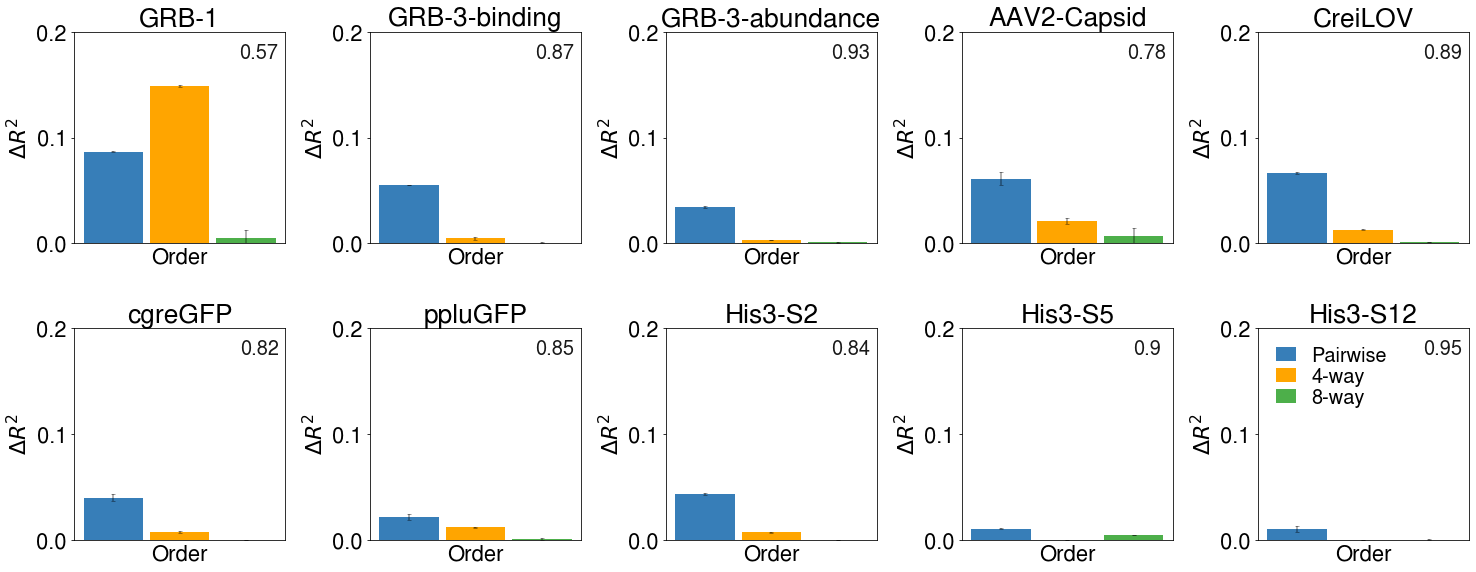

In [40]:
fig, axs = plt.subplots(2, 5, figsize=(25, 10),
                       gridspec_kw={'hspace': 0.2, 'wspace': 0.4})  # 2 rows, 1 column
for i in range(len(data_list)):  
    data_name = data_list[i]
    df = R2_[data_name]
    mean_df = []
    std_df = []
    for p in ['80%']:
        df_subp = df.index.astype(str).str.contains("_" + p[:2])
        df_sub = df[df_subp]
        df_sub_b = df_sub.copy()
        for m in [1, 2, 3]:
            df_sub_b.iloc[:, m] = df_sub.iloc[:, m].to_numpy() - df_sub.iloc[:, m - 1].to_numpy()   
        df_sub_b[df_sub_b < 0] = 0
        mean_df.append(df_sub_b.mean())
        std_df.append(df_sub_b.std())
    mean_df = pd.DataFrame(mean_df)
    std_df = pd.DataFrame(std_df)
    
    axs[int(i/5), i%5].bar(models[1:], mean_df.to_numpy()[0][1:], 
                           yerr=std_df.to_numpy()[0][1:], capsize=2, color=colors[1:], error_kw={'alpha': 0.4},
              width=.9, alpha=1, label=models[1:])

    if i == 9:
        axs[int(i/5), i%5].legend(loc='upper left', frameon=False, fontsize=20, 
                          labelspacing=0.1, handlelength=1.0)
    
    axs[int(i/5), i%5].set_xticks([])
    axs[int(i/5), i%5].set_yticks([0, .1, .2])

    axs[int(i/5), i%5].set_ylim(0, .2)
    axs[int(i/5), i%5].set_box_aspect(1)

    axs[int(i/5), i%5].set_title(name_dict[data_name])
    axs[int(i/5), i%5].set_ylabel('$\Delta R^2$')
    axs[int(i/5), i%5].set_xlabel('Order')
    axs[int(i/5), i%5].text(2.2, .18, f"{np.round(mean_df['Additive'].item(), 2)}", 
                            fontsize=20, ha='center', va='center', color='black', alpha=.9)

### Percent R2

In [45]:
data_name = 'Sinai2021'
df = R2_[data_name]
mean_df = []
std_df = []
for p in ['80%']:
    df_subp = df.index.astype(str).str.contains("_" + p[:2])
    df_sub = df[df_subp]
    df_sub_b = df_sub.copy()
    for m in [1, 2, 3]:
        diffs = (df_sub.iloc[:, m].to_numpy() - df_sub.iloc[:, m - 1].to_numpy())
        res_r2 = (1 - df_sub.iloc[:, 0].to_numpy())
        res_8_r2 = (1 - df_sub.iloc[:, 3].to_numpy())
        df_sub_b.iloc[:, m] = diffs/res_r2
    df_sub_b[df_sub_b < 0] = 0
    mean_df.append(df_sub_b.mean())
    std_df.append(df_sub_b.std())
mean_df = pd.DataFrame(mean_df)
std_df = pd.DataFrame(std_df)

In [46]:
df = df_sub

In [47]:
def get_r_stat(df, norm_by_r2_res=True):
    df_ = df.copy()
    df__ = df.copy()
    for i in range(4): #REMOVE
        df_.iloc[:, i] = df_.iloc[:, :i + 1].max(1) # REMOVE
    for m in [1, 2, 3]:
        diffs = (df_.iloc[:, m].to_numpy() - df_.iloc[:, m - 1].to_numpy())
        res_r2 = (1 - df_.iloc[:, 0].to_numpy())
        res_8_r2 = (1 - df.max(1))
        if norm_by_r2_res:
            df__.iloc[:, m] = diffs/res_r2
        else: 
            df__.iloc[:, m] = diffs
    df__[df__ < 0] = 0
    
    return df__

In [48]:
def get_r_stat(df, norm=None):
    df_ = df.copy()
    df__ = df.copy()
    for i in range(4): #REMOVE
        df_.iloc[:, i] = df_.iloc[:, :i + 1].max(1) # REMOVE
    for m in [1, 2, 3]:
        diffs = (df_.iloc[:, m].to_numpy() - df_.iloc[:, m - 1].to_numpy())
        res_r2 = (1 - df_.iloc[:, 0].to_numpy())
        epi_r2 = (df_.iloc[:, -1].to_numpy() - df_.iloc[:, 0].to_numpy())
        res_8_r2 = (1 - df.max(1))
        if norm == 'res':
            df__.iloc[:, m] = diffs/res_r2
        elif norm == 'epi':
            df__.iloc[:, m] = diffs/epi_r2
        else: 
            df__.iloc[:, m] = diffs
    df__[df__ < 0] = 0
    
    return df__

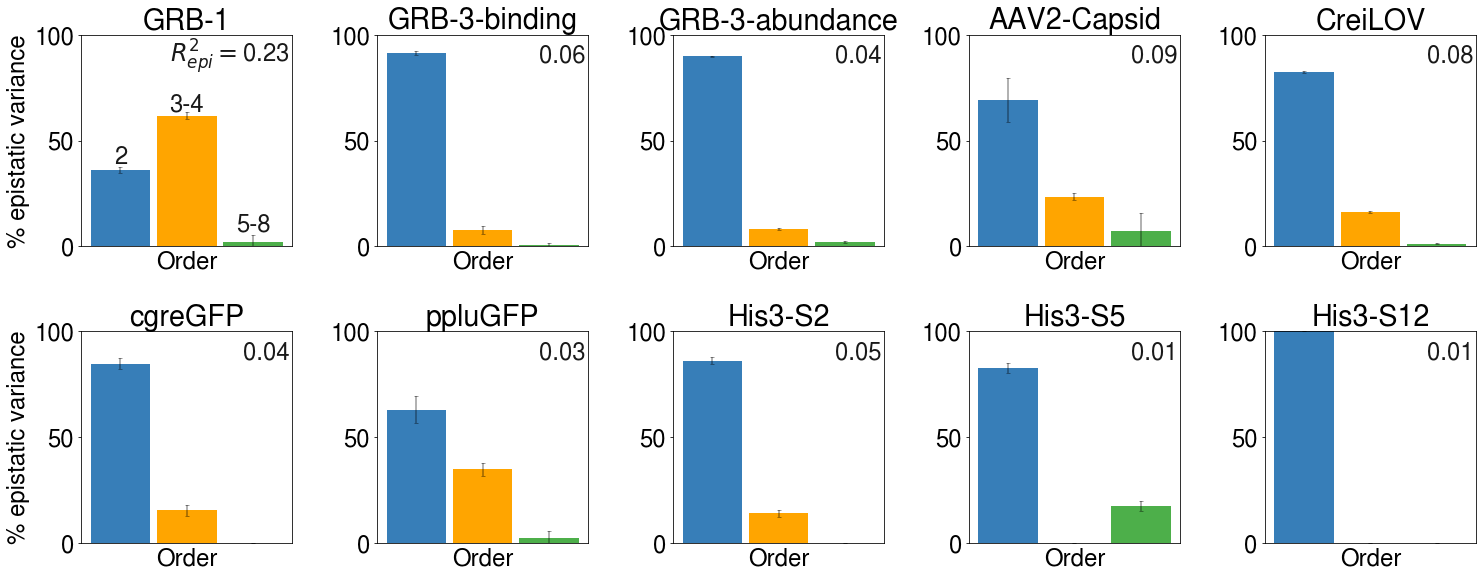

In [49]:
models = ["Linear", "Pairwise", "4-way", "8-way"]
colors = ['gray', '#377eb8',  '#dede00', 'orange']
colors = ['gray', '#377eb8',  '#4daf4a', 'orange']

plt.rcParams.update({'font.size': 24})
plt.rcParams['font.family'] =  'Nimbus Sans'

colors = ['gray', '#377eb8',  'orange', '#4daf4a']

fig, axs = plt.subplots(2, 5, figsize=(25, 10),
                       gridspec_kw={'hspace': 0.2, 'wspace': 0.4})  # 2 rows, 1 column
for i in range(len(data_list)):  
    data_name = data_list[i]
    df = R2_[data_name]
    mean_df = []
    std_df = []
    for p in ['80%']:
        df_subp = df.index.astype(str).str.contains("_" + p[:2])
        df_sub = df[df_subp]
        r2_epi = (df_sub.iloc[:, -1] - df_sub.iloc[:, 0]).mean()
        summary = get_r_stat(df_sub, norm='epi')
        mean_df.append(summary.mean())
        std_df.append(summary.std())
    mean_df = pd.DataFrame(mean_df)
    std_df = pd.DataFrame(std_df)    
    axs[int(i/5), i%5].bar(models[1:], 100*mean_df.to_numpy()[0][1:], 
                           yerr=100*std_df.to_numpy()[0][1:], capsize=2, color=colors[1:], error_kw={'alpha': 0.4},
              width=.9, alpha=1, label=models[1:])

    # if i == 9:
    #     axs[int(i/5), i%5].legend(loc='upper left', frameon=False, fontsize=20, 
    #                       labelspacing=0.1, handlelength=1.0)
    
    axs[int(i/5), i%5].set_xticks([])
    # axs[int(i/5), i%5].set_yticks([0, 20, 40, 60, 80])
    axs[int(i/5), i%5].set_yticks([0, 50, 100])    

    axs[int(i/5), i%5].set_ylim(0, 100)
    axs[int(i/5), i%5].set_box_aspect(1)

    axs[int(i/5), i%5].set_title(name_dict[data_name])
    if i%5 == 0:
        axs[int(i/5), i%5].set_ylabel('% epistatic variance')
    axs[int(i/5), i%5].set_xlabel('Order')
    
    if i==0:
        # axs[int(i/5), i%5].text(1.65, 100*.9, "$R^2_{\t{add}} = $" + f"{np.round(mean_df['Additive'].item(), 2)}", 
        #                         fontsize=24, ha='center', va='center', color='black', alpha=.9)

        axs[int(i/5), i%5].text(1.65, 100*.9, "$R^2_{\t{epi}} = $" + f"{np.round(r2_epi, 2)}", 
                                fontsize=24, ha='center', va='center', color='black', alpha=.9)
        
        axs[int(i/5), i%5].text(0, 100*.42, "2", fontsize=24, ha='center', va='center', color='black', alpha=.9)
        axs[int(i/5), i%5].text(1, 100*.67, "3-4", fontsize=24, ha='center', va='center', color='black', alpha=.9)
        axs[int(i/5), i%5].text(2, 100*.1, "5-8", fontsize=24, ha='center', va='center', color='black', alpha=.9)
    else:
        axs[int(i/5), i%5].text(2.2, 100*.9, f"{np.round(r2_epi, 2)}",
                                fontsize=24, ha='center', va='center', color='black', alpha=.9)

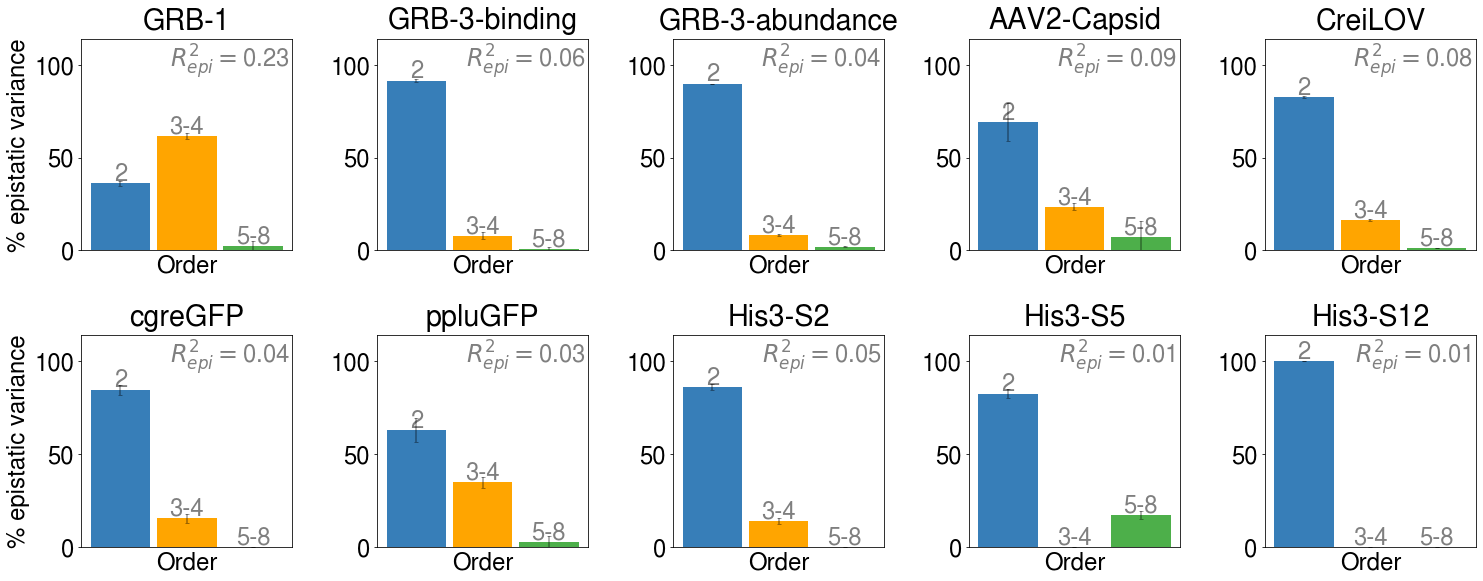

In [50]:
models = ["Linear", "Pairwise", "4-way", "8-way"]
colors = ['gray', '#377eb8',  '#dede00', 'orange']
colors = ['gray', '#377eb8',  '#4daf4a', 'orange']

plt.rcParams.update({'font.size': 24})
plt.rcParams['font.family'] =  'Nimbus Sans'

colors = ['gray', '#377eb8',  'orange', '#4daf4a']

fig, axs = plt.subplots(2, 5, figsize=(25, 10),
                       gridspec_kw={'hspace': 0.2, 'wspace': 0.4})  # 2 rows, 1 column
for i in range(len(data_list)):  
    data_name = data_list[i]
    df = R2_[data_name]
    mean_df = []
    std_df = []
    for p in ['80%']:
        df_subp = df.index.astype(str).str.contains("_" + p[:2])
        df_sub = df[df_subp]
        r2_epi = (df_sub.iloc[:, -1] - df_sub.iloc[:, 0]).mean()
        summary = get_r_stat(df_sub, norm='epi')
        mean_df.append(summary.mean())
        std_df.append(summary.std())
    mean_df = pd.DataFrame(mean_df)
    std_df = pd.DataFrame(std_df)    
    axs[int(i/5), i%5].bar(models[1:], 100*mean_df.to_numpy()[0][1:], 
                           yerr=100*std_df.to_numpy()[0][1:], capsize=2, color=colors[1:], error_kw={'alpha': 0.4},
              width=.9, alpha=1, label=models[1:])

    # if i == 9:
    #     axs[int(i/5), i%5].legend(loc='upper left', frameon=False, fontsize=20, 
    #                       labelspacing=0.1, handlelength=1.0)
    
    axs[int(i/5), i%5].set_xticks([])
    # axs[int(i/5), i%5].set_yticks([0, 20, 40, 60, 80])
    axs[int(i/5), i%5].set_yticks([0, 50, 100])    

    axs[int(i/5), i%5].set_ylim(0, 114)
    axs[int(i/5), i%5].set_box_aspect(1)

    axs[int(i/5), i%5].set_title(name_dict[data_name], pad=10)
    if i%5 == 0:
        axs[int(i/5), i%5].set_ylabel('% epistatic variance')
    axs[int(i/5), i%5].set_xlabel('Order')

    axs[int(i/5), i%5].text(1.65, 102, "$R^2_{\t{epi}} = $" + f"{np.round(r2_epi, 2)}", 
                            fontsize=24, ha='center', va='center', color='black', alpha=.5)

    axs[int(i/5), i%5].text(0, 100*mean_df['Pairwise'] + 5, "2", fontsize=24, ha='center', va='center', color='black', alpha=.5)
    axs[int(i/5), i%5].text(1, 100*mean_df['4-th order'] + 5, "3-4", fontsize=24, ha='center', va='center', color='black', alpha=.5)
    axs[int(i/5), i%5].text(2, 100*mean_df['8-th order'] + 5, "5-8", fontsize=24, ha='center', va='center', color='black', alpha=.5)
    

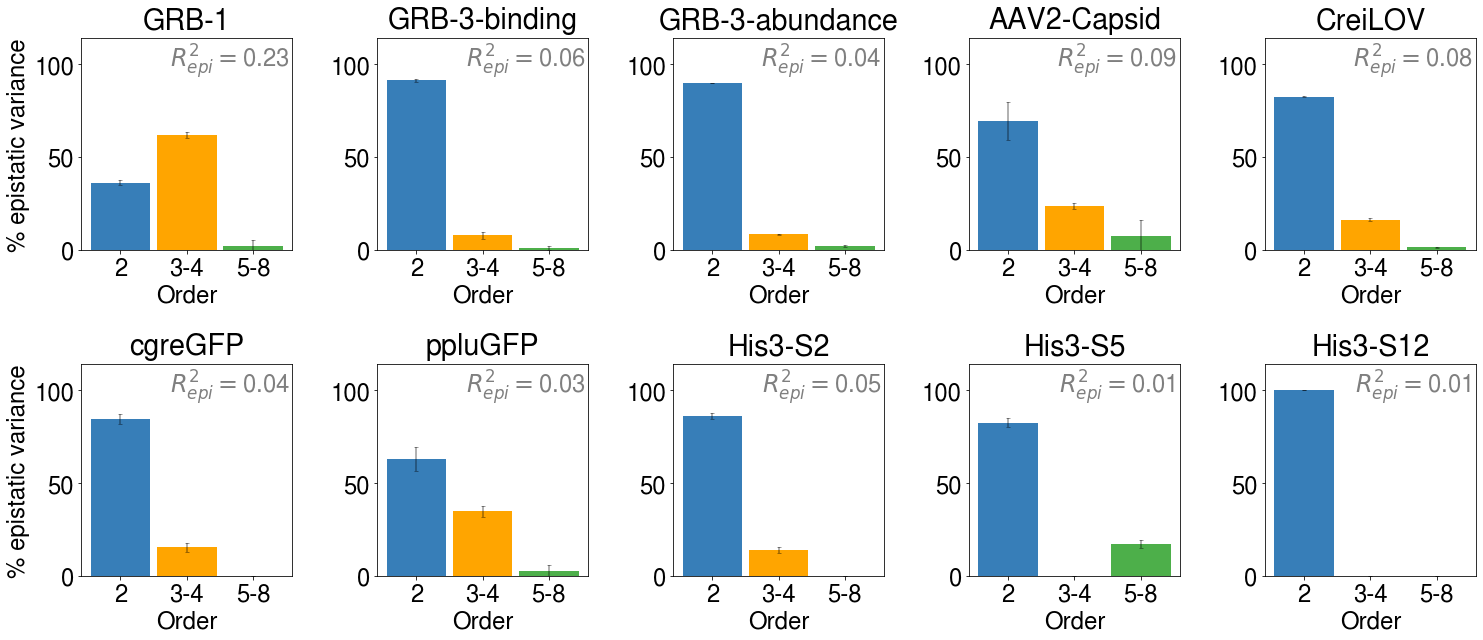

In [51]:
models = ["Linear", "Pairwise", "4-way", "8-way"]
colors = ['gray', '#377eb8',  '#dede00', 'orange']
colors = ['gray', '#377eb8',  '#4daf4a', 'orange']

plt.rcParams.update({'font.size': 24})
plt.rcParams['font.family'] =  'Nimbus Sans'

colors = ['gray', '#377eb8',  'orange', '#4daf4a']

fig, axs = plt.subplots(2, 5, figsize=(25, 10),
                       gridspec_kw={'hspace': 0.5, 'wspace': 0.4})  # 2 rows, 1 column
for i in range(len(data_list)):  
    data_name = data_list[i]
    df = R2_[data_name]
    mean_df = []
    std_df = []
    for p in ['80%']:
        df_subp = df.index.astype(str).str.contains("_" + p[:2])
        df_sub = df[df_subp]
        r2_epi = (df_sub.iloc[:, -1] - df_sub.iloc[:, 0]).mean()
        summary = get_r_stat(df_sub, norm='epi')
        mean_df.append(summary.mean())
        std_df.append(summary.std())
    mean_df = pd.DataFrame(mean_df)
    std_df = pd.DataFrame(std_df)    
    axs[int(i/5), i%5].bar(models[1:], 100*mean_df.to_numpy()[0][1:], 
                           yerr=100*std_df.to_numpy()[0][1:], capsize=2, color=colors[1:], error_kw={'alpha': 0.4},
              width=.9, alpha=1, label=models[1:])

    # if i == 9:
    #     axs[int(i/5), i%5].legend(loc='upper left', frameon=False, fontsize=20, 
    #                       labelspacing=0.1, handlelength=1.0)
    
    axs[int(i/5), i%5].set_xticks([])
    # axs[int(i/5), i%5].set_yticks([0, 20, 40, 60, 80])
    axs[int(i/5), i%5].set_yticks([0, 50, 100])    

    axs[int(i/5), i%5].set_ylim(0, 114)
    axs[int(i/5), i%5].set_box_aspect(1)

    axs[int(i/5), i%5].set_title(name_dict[data_name], pad=10)
    if i%5 == 0:
        axs[int(i/5), i%5].set_ylabel('% epistatic variance')
    axs[int(i/5), i%5].set_xlabel('Order')

    axs[int(i/5), i%5].text(1.65, 102, "$R^2_{\t{epi}} = $" + f"{np.round(r2_epi, 2)}", 
                            fontsize=24, ha='center', va='center', color='black', alpha=.5)

    axs[int(i/5), i%5].set_xticks(ticks=range(3), labels=["2", "3-4", "5-8"])


In [52]:
fig.savefig("../figures/r2s_80%_v2.pdf", bbox_inches='tight')        

## Supplemental Figure 2

#### With GE

In [315]:
result_path = "/blue/juannanzhou/palash.sethi/Projects/ProteinLLEs/ProteinLLE_v4/output/"

matching_folders = []

for root, dirs, files in os.walk(result_path):
    for dir in dirs:
        full_dir_path = os.path.join(root, dir)
        if 'done' in os.listdir(full_dir_path):
            matching_folders.append(result_path + dir)

In [316]:
r2_all = {}

for d in matching_folders:
    r2s = pd.read_csv(d + "/R2s.csv", index_col = 0).to_numpy().T[0]
    r2s = np.pad(r2s, (0, 4 - len(r2s)), mode='constant')
    r2_all[d] = r2s

In [317]:
R2_df = pd.DataFrame(r2_all).T
R2_df.columns = ["Additive", "Pairwise", "4-th order", "8-th order"]
R2_df = R2_df.sort_index()

In [318]:
R2_ = {}

for data in data_list:
    R2_[data] = R2_df[[data in ID for ID in R2_df.index]]

#### Without GE

In [319]:
result_path = "/blue/juannanzhou/ProteinLLE/output/"

matching_folders = []

for root, dirs, files in os.walk(result_path):
    for dir in dirs:
        if "Random-add-only-no-ge" in dir:
            full_dir_path = os.path.join(root, dir)
            matching_folders.append(result_path + dir)

In [320]:
r2_all = {}

for d in matching_folders:
    r2s = pd.read_csv(d + "/R2s.csv", index_col = 0).to_numpy().T[0]
    r2s = np.pad(r2s, (0, 4 - len(r2s)), mode='constant')
    r2_all[d] = r2s

In [321]:
R2_df = pd.DataFrame(r2_all).T

# R2_df.columns = ["Additive", "Pairwise", "4th-Order", "8th-Order"]
R2_df.columns = ["Additive", "Pairwise", "4-th order", "8-th order"]
R2_df = R2_df.sort_index()

In [322]:
R2_no = {}

for data in data_list:
    R2_no[data] = R2_df[[data in ID for ID in R2_df.index]]

#### Plotting

In [323]:
colors = ['#377eb8', '#0f365e']

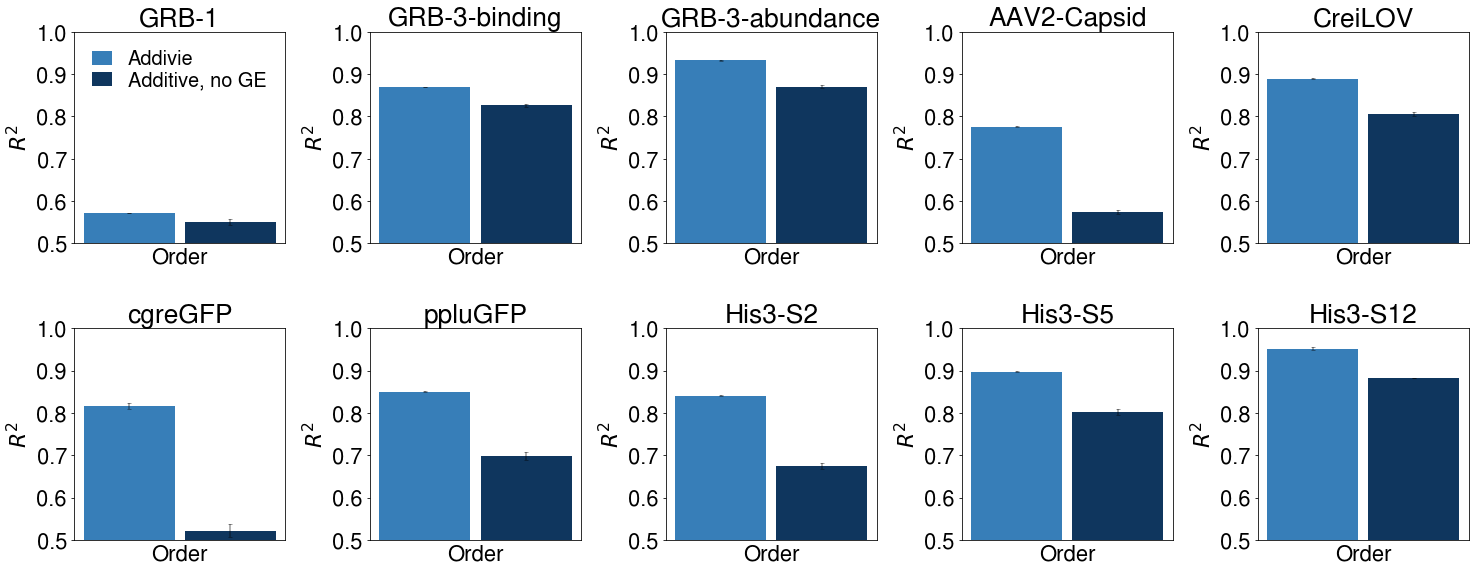

In [324]:
fig, axs = plt.subplots(2, 5, figsize=(25, 10),
                       gridspec_kw={'hspace': 0.2, 'wspace': 0.4})  # 2 rows, 1 column
for i in range(len(data_list)):  
    data_name = data_list[i]
    
    # add with GE
    df = R2_[data_name]
    mean_df = []
    std_df = []
    for p in ['80%']:
        df_subp = df.index.astype(str).str.contains("_" + p[:2])
        df_sub = df[df_subp]
        df_sub_b = df_sub.copy()
        for m in [1, 2, 3]:
            df_sub_b.iloc[:, m] = df_sub.iloc[:, m].to_numpy() - df_sub.iloc[:, m - 1].to_numpy()   
        df_sub_b[df_sub_b < 0] = 0
        mean_df.append(df_sub_b.mean())
        std_df.append(df_sub_b.std())
    mean_df = pd.DataFrame(mean_df)
    std_df = pd.DataFrame(std_df)

    # add with no GE
    df = R2_no[data_name]
    mean_df_no = []
    std_df_no = []
    for p in ['80%']:
        df_subp = df.index.astype(str).str.contains("_" + p[:2])
        df_sub = df[df_subp]
        df_sub_b = df_sub.copy()
        for m in [1, 2, 3]:
            df_sub_b.iloc[:, m] = df_sub.iloc[:, m].to_numpy() - df_sub.iloc[:, m - 1].to_numpy()   
        df_sub_b[df_sub_b < 0] = 0
        mean_df_no.append(df_sub_b.mean())
        std_df_no.append(df_sub_b.std())
    mean_df_no = pd.DataFrame(mean_df_no)
    std_df_no = pd.DataFrame(std_df_no)
    
    mean_2 = pd.DataFrame({'add': mean_df['Additive'], 'add_no': mean_df_no['Additive'], })
    std_2 = pd.DataFrame({'add': std_df['Additive'], 'add_no': std_df_no['Additive'], })

    axs[int(i/5), i%5].bar(['add', 'add_no'], mean_2.to_numpy()[0], 
                           yerr=std_2.to_numpy()[0], capsize=2, color=colors, error_kw={'alpha': 0.4},
                           width=.9, alpha=1, label=['Addivie', 'Additive, no GE'])

    if i == 0:
        axs[int(i/5), i%5].legend(loc='upper left', fontsize=20, frameon=False, labelspacing=0.1, handlelength=1.0)
    
    axs[int(i/5), i%5].set_xticks([])
    axs[int(i/5), i%5].set_yticks([0.5, .6, .7, .8, .9, 1])

    axs[int(i/5), i%5].set_ylim(0.5, 1)
    axs[int(i/5), i%5].set_box_aspect(1)

    axs[int(i/5), i%5].set_title(name_dict[data_name])
    axs[int(i/5), i%5].set_ylabel('$R^2$')
    axs[int(i/5), i%5].set_xlabel('Order')
    # axs[int(i/5), i%5].text(1, .8, f"{np.round((mean_2['add'] - mean_2['add_no']).item(), 2)}", 
    #                         fontsize=20, ha='center', va='center', color='black', alpha=.9)
    
        # handles, labels = axs[int(i/5), i%5].get_legend_handles_labels()
        # handles = handles[::-1]
        # labels = labels[::-1]
        # axs[int(i/5), i%5].legend(handles, labels, loc='center left', fontsize=24, frameon=False)
    # axs[int(i/5), i%5].set_box_aspect(1)
fig.savefig("../figures/r2s_add_comparison%.pdf", bbox_inches='tight')            